# 1 Import Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r"C:\Users\miche\Instacart Basket Analysis 2022_MP\02 Data"

In [3]:
# Import orders_products_flags.pkl
merged = pd.read_pickle(os.path.join(path, 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
# Explore data
merged.shape

(6481355, 30)

In [6]:
merged.head()

,order_id,customer_id,order_number,order_day,order_hour,previous_order,product_id,add_to_cart_order,reordered,product_name,...,median_previous_order,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,3367565,1,6,2,7,19.0,12427,2,1,Original Beef Jerky,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2550362,1,10,4,8,30.0,12427,9,1,Original Beef Jerky,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,473747,1,3,3,12,21.0,196,1,1,Soda,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
merged.columns

Index(['order_id', 'customer_id', 'order_number', 'order_day', 'order_hour',
       'previous_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'department_id', 'prices', 'price_range', 'busy_day',
       'busy_days', 'busy_hours', 'max_order', 'loyalty_flag', 'average_price',
       'spender_flag', 'median_previous_order', 'customer_frequency', 'gender',
       'state', 'age', 'date_joined', 'dependents', 'fam_status', 'income',
       '_merge'],
      dtype='object')

# 2 Create Bar Chart, Histogram, Scatterplot, Line Chart

<AxesSubplot:>

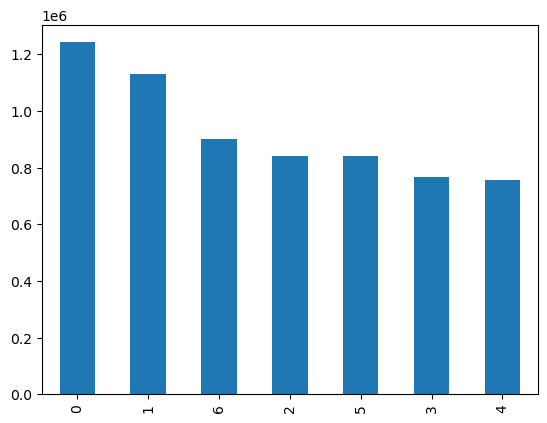

In [8]:
# Code chart for busiest day of the week
merged['order_day'].value_counts().plot.bar()

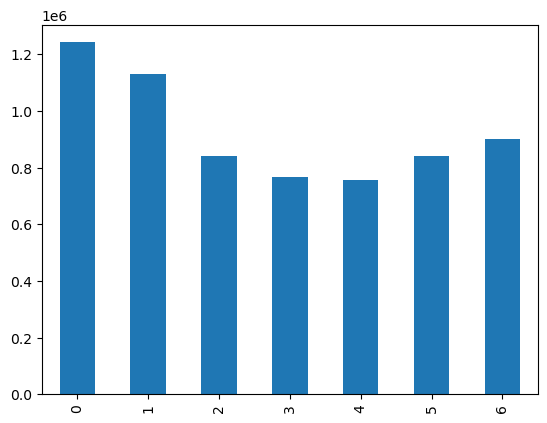

In [9]:
# Create bar chart by in order of index
bar_order_day=merged['order_day'].value_counts().sort_index().plot.bar()

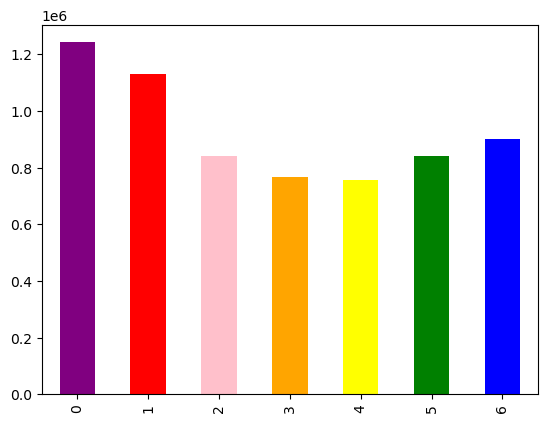

In [10]:
bar_color_order_day = merged['order_day'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [16]:
# Export visualizations
bar_order_day.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_order_day.png")
bar_color_order_day.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_color_order_day.png")

<AxesSubplot:ylabel='Frequency'>

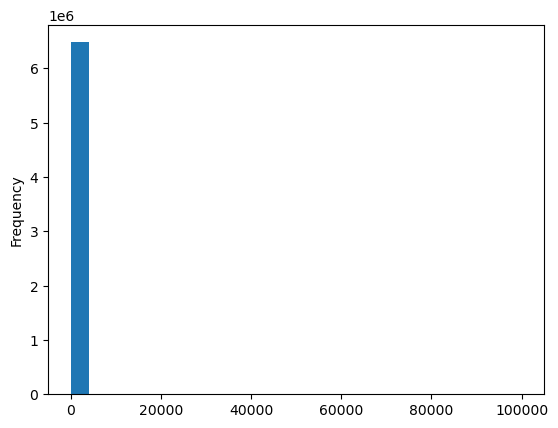

In [11]:
# Create histgram of prices
merged['prices'].plot.hist(bins = 25)

In [12]:
# Explore what's causing issue
merged['prices'].describe()

count    6.481355e+06
mean     1.216758e+01
std      5.081096e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
merged['prices'].mean()

12.167576887803586

In [14]:
merged['prices'].median()

7.4

In [15]:
merged['prices'].max()

99999.0

In [17]:
# Check for outliers
merged.loc[merged['prices'] > 100]

,order_id,customer_id,order_number,order_day,order_hour,previous_order,product_id,add_to_cart_order,reordered,product_name,...,median_previous_order,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,_merge
18890,2884554,917,8,2,20,8.0,21553,21,1,Lowfat 2% Milkfat Cottage Cheese,...,6.0,Frequent customer,Female,Wisconsin,62,5/19/2018,3,married,552776,both
20483,1608902,21859,11,2,15,13.0,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,13.0,Regular customer,Male,Oklahoma,75,10/7/2019,3,married,119428,both
28187,2812144,74759,3,1,10,7.0,21553,7,1,Lowfat 2% Milkfat Cottage Cheese,...,9.0,Frequent customer,Male,Texas,29,2/10/2020,1,married,355945,both
28188,400689,74759,5,2,13,4.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,9.0,Frequent customer,Male,Texas,29,2/10/2020,1,married,355945,both
35922,2162711,134631,1,6,16,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,30.0,Non-frequent customer,Female,South Dakota,73,8/21/2019,2,married,256618,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423218,23724,77427,2,0,16,8.0,33664,6,1,2 % Reduced Fat Milk,...,8.0,Frequent customer,Female,District of Columbia,43,7/20/2018,0,single,289765,both
6427340,2218438,64201,5,2,19,7.0,33664,8,1,2 % Reduced Fat Milk,...,9.0,Frequent customer,Male,Tennessee,63,1/17/2018,1,married,197065,both
6428186,1633376,92034,1,5,10,NaN,33664,4,0,2 % Reduced Fat Milk,...,7.0,Frequent customer,Male,Ohio,40,2/10/2020,0,single,97243,both
6459553,812000,46287,4,6,9,9.0,33664,2,1,2 % Reduced Fat Milk,...,9.0,Frequent customer,Male,Ohio,78,1/27/2018,3,married,209463,both


In [18]:
# Set prices over 100 to nan
merged.loc[merged['prices']>100, 'prices']=np.nan

In [19]:
# Confirm change

merged['prices'].max()

25.0

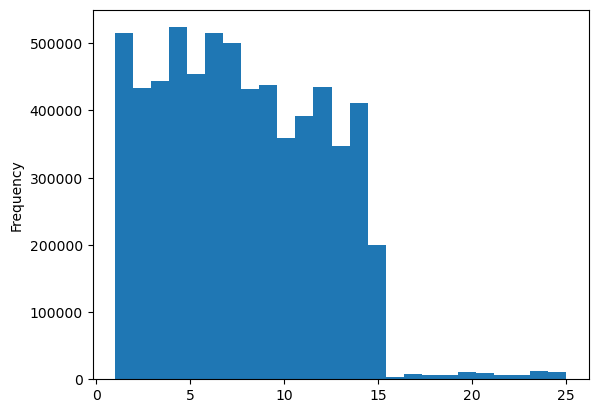

In [20]:
# Create histograms
histo_prices=merged['prices'].plot.hist(bins=25)

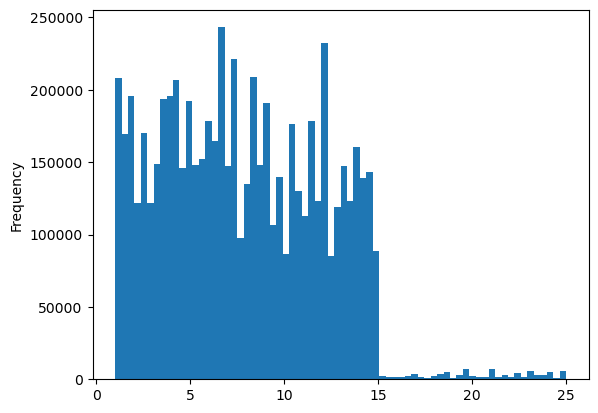

In [21]:
# Change bin size
histo_prices_70=merged['prices'].plot.hist(bins=70)

<AxesSubplot:xlabel='prices', ylabel='prices'>

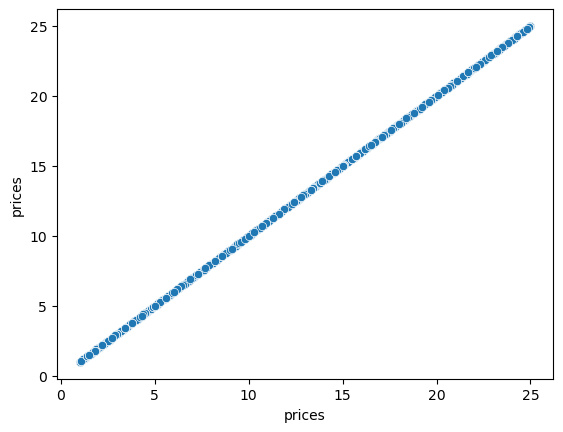

In [23]:
# Create scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = merged)

In [25]:
# Create smaller dataframe for the line chart code to work on
merged_2=merged[['order_day','prices']]

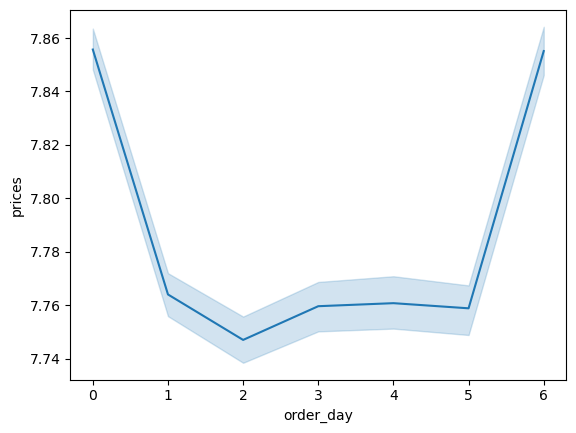

In [26]:
# Run line chart
line = sns.lineplot(data = merged_2, x = 'order_day',y = 'prices')

# 3 Create order_hour Histogram

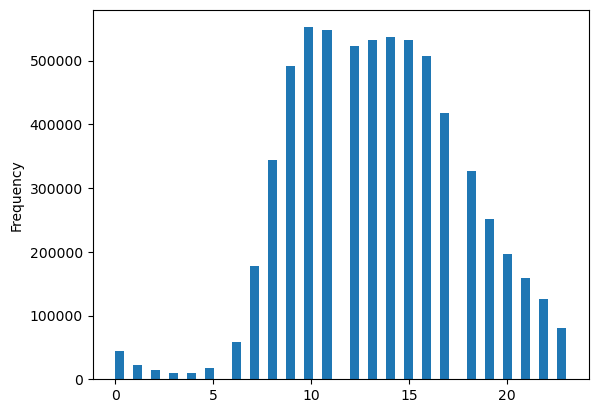

In [27]:
# Create histogram for order_hour
histo_order_hour=merged['order_hour'].plot.hist(bins=50)

#### Busiest hours fall between 10am - 5pm

# 4 Create loyalty_flag Bar Chart

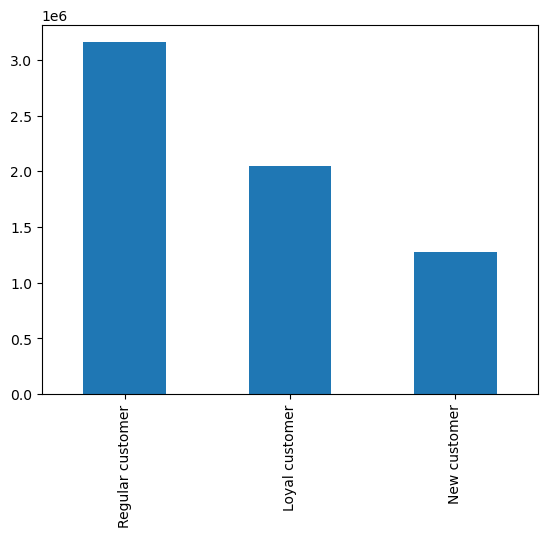

In [28]:
# Create loyalty_flag bar chart
bar_loyalty=merged['loyalty_flag'].value_counts().plot.bar()

# 5 Create Line Chart for hourly spend

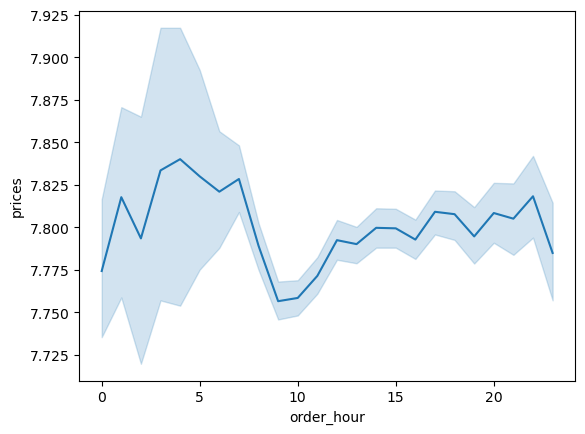

In [29]:
# Create line chart looking at expenditure by hour
line_hourly_spend = sns.lineplot(data = merged, x = 'order_hour',y = 'prices')

In [40]:
# Export charts
histo_prices.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\histo_prices.png")
line.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\line_order_day.png")
histo_order_hour.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\histo_order_hour.png")
bar_loyalty.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\bar_loyalty.png")
line_hourly_spend.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\line_hourly_spend.png")

In [30]:
# Delete charts for memory purposes
del bar_order_day
del bar_color_order_day
del histo_prices
del line
del histo_order_hour
del bar_loyalty
del line_hourly_spend

# 6 Create a Line Chart comparing age and dependents

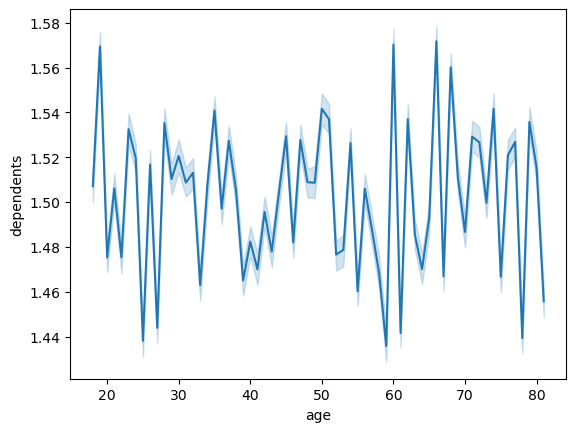

In [31]:
# Create line chart looking at age and dependents
line_age_dependents = sns.lineplot(data = merged, x = 'age',y = 'dependents')

#### No correlation can be made between age and number of dependents

# 7 Create a Scatterplot to determine spending power of different ages

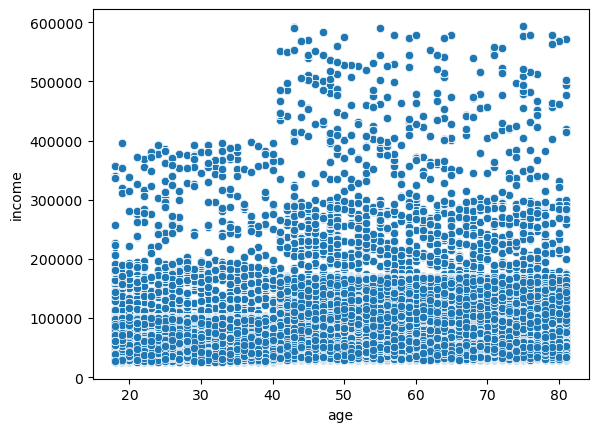

In [32]:
# Create scatterplot
scatter_spendpower=sns.scatterplot(x = 'age', y = 'income',data = merged)

#### Spending poer increases around age 40.

# 8 Export .png files

In [33]:
# Export charts
scatter_spendpower.figure.savefig(r"C:\Users\miche\Instacart Basket Analysis 2022_MP\04 Analysis\Visualizations\scatter_spending_power.png")